Dataset loaded successfully.
   Gender    Education          Job_Title    Industry  Experience_Years  \
0    Male       Master  Software Engineer  Healthcare                15   
1  Female  High School            Manager     Finance                12   
2    Male  High School     Data Scientist     Finance                16   
3    Male          PhD     Data Scientist  Healthcare                24   
4    Male       Master     Data Scientist  Healthcare                19   

     Salary  
0   91748.8  
1   87448.9  
2  101495.9  
3   86414.9  
4  125750.9  
Missing values:
 Gender              0
Education           0
Job_Title           0
Industry            0
Experience_Years    0
Salary              0
dtype: int64
T-test Statistic: -1.0463168409925474, P-value: 0.29592489367311475
No significant difference in salaries between genders.
Mean Absolute Error: 24694.398718261895
R-squared Score: -0.3052828651315076

Average Salary by Gender:
               Salary  Predicted_Salary
Gender 

<ipython-input-3-bbfec8d0ebe1>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_salary.index, y=gender_salary['Salary'], palette='coolwarm')


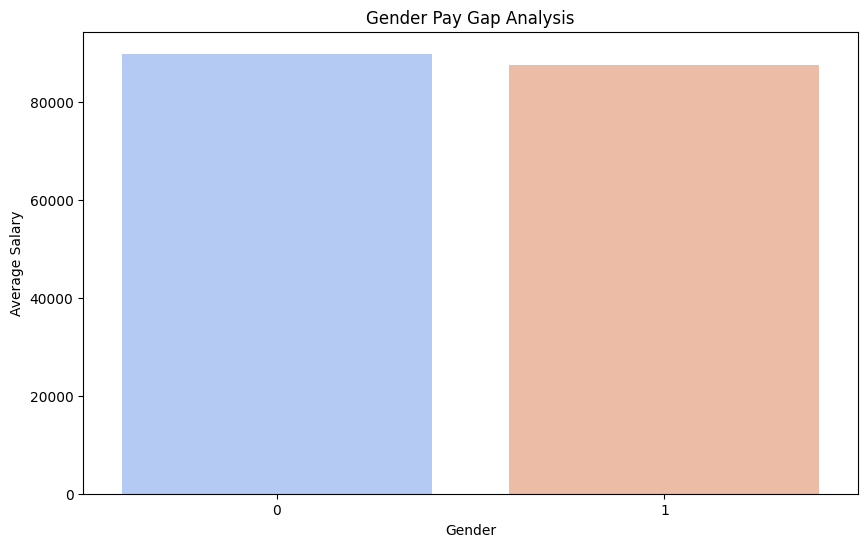

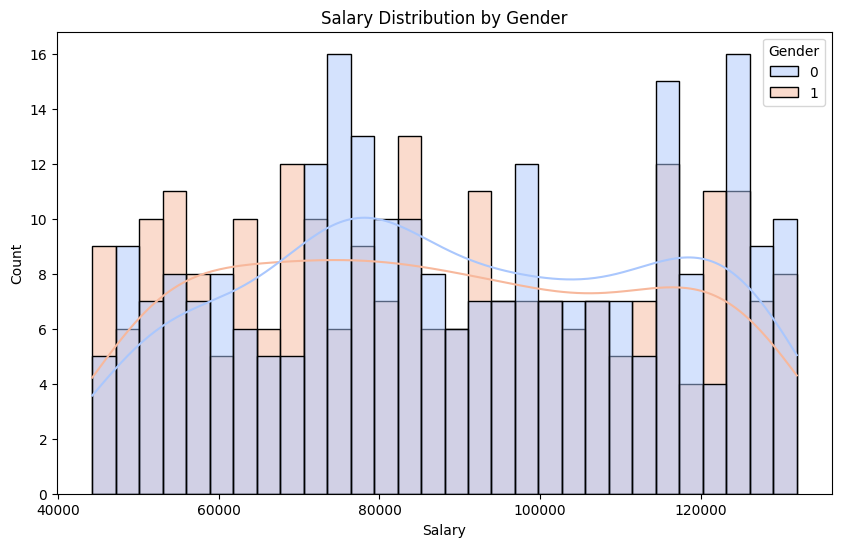

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset (replace with actual dataset path)
try:
    data = pd.read_csv('gender_pay_gap_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found.")
    exit()

# Display first few rows
print(data.head())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Ensure 'Salary' column exists
if 'Salary' not in data.columns:
    print("Error: 'Salary' column not found in dataset.")
    exit()

# Drop rows with missing salary values
data = data.dropna(subset=['Salary'])

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Education', 'Job_Title', 'Industry']

for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in dataset.")

# Statistical Analysis: Comparing Salaries by Gender
if 'Gender' in data.columns:
    male_salaries = data[data['Gender'] == 1]['Salary']
    female_salaries = data[data['Gender'] == 0]['Salary']
    t_stat, p_value = stats.ttest_ind(male_salaries, female_salaries, equal_var=False)
    print(f"T-test Statistic: {t_stat}, P-value: {p_value}")
    if p_value < 0.05:
        print("There is a statistically significant difference in salaries based on gender.")
    else:
        print("No significant difference in salaries between genders.")

# Split features and target
X = data.drop(columns=['Salary'])
y = data['Salary']

# Check if X is empty after dropping columns
if X.empty:
    print("Error: No valid features found after dropping 'Salary'.")
    exit()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Gender-based salary analysis
if 'Gender' in data.columns:
    data['Predicted_Salary'] = model.predict(X_scaled)
    gender_salary = data.groupby('Gender')[['Salary', 'Predicted_Salary']].mean()
    print("\nAverage Salary by Gender:\n", gender_salary)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=gender_salary.index, y=gender_salary['Salary'], palette='coolwarm')
    plt.xlabel('Gender')
    plt.ylabel('Average Salary')
    plt.title('Gender Pay Gap Analysis')
    plt.show()

    # Distribution of Salaries by Gender
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x='Salary', hue='Gender', kde=True, bins=30, palette='coolwarm')
    plt.title('Salary Distribution by Gender')
    plt.show()
else:
    print("Error: 'Gender' column not found in dataset.")
